# Understanding and Browsing Youtube-8m Dataset

Import required libraries

In [22]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import glob
import pandas as pd
from IPython.display import YouTubeVideo

------------

Youtube-8m dataset has pre-defined class list.

In [23]:
vocabulary_data = pd.read_csv('./vocabulary.csv')

In [24]:
vocabulary_data.head(25)

,Index,TrainVideoCount,KnowledgeGraphId,Name
0,0,788288,/m/03bt1gh,Game
1,1,539945,/m/01mw1,Video game
2,2,415890,/m/07yv9,Vehicle
3,3,378135,/m/01jddz,Concert
4,4,286532,/m/09jwl,Musician
5,5,236948,/m/0215n,Cartoon
6,6,203343,/m/01350r,Performance art
7,7,200813,/m/0k4j,Car
8,8,181579,/m/026bk,Dance
9,9,156226,/m/0342h,Guitar


In [25]:
vocabulary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3862 entries, 0 to 3861
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             3862 non-null   int64 
 1   TrainVideoCount   3862 non-null   int64 
 2   KnowledgeGraphId  3862 non-null   object
 3   Name              3806 non-null   object
dtypes: int64(2), object(2)
memory usage: 120.8+ KB


In [26]:
vocabulary_data.describe()

,Index,TrainVideoCount
count,3862.000000,3862.000000
mean,1930.500000,3032.527188
std,1115.007698,21182.048375
min,0.000000,123.000000
25%,965.250000,234.000000
50%,1930.500000,440.500000
75%,2895.750000,1199.750000
max,3861.000000,788288.000000


-------------------- 

The video-level dataset that provides video-level features is stored as a tensorflow. There are around 7,689 TFRecords. The total size is around 31GB. Let's browse one of the record and filter only **Cooking** category data.

Note: Cooking has class/label id 22 which we referef from vocabulary file.

In [27]:
record = "./train3815.tfrecord"

In [28]:
vid_ids = []
labels = []
rgb = []
audio = []

In [29]:
for example in tf.compat.v1.python_io.tf_record_iterator(record):
    seq_example = tf.train.Example.FromString(example)
    # filter videos containing "Cooking" label
    if 22 in seq_example.features.feature['labels'].int64_list.value:
        vid_ids.append(seq_example.features.feature['id'].bytes_list.value[0].decode(encoding='UTF-8'))
        labels.append(seq_example.features.feature['labels'].int64_list.value)
        rgb.append(seq_example.features.feature['mean_rgb'].float_list.value)
        audio.append(seq_example.features.feature['mean_audio'].float_list.value)

In [30]:
print('Number of videos in this tfrecord: ',len(vid_ids))
print ('Number of labels in this tfrecord: ', len (labels))

Number of videos in this tfrecord:  21
Number of labels in this tfrecord:  21


In [31]:
vid_ids

['ZU9H',
 'Xz9H',
 'yU9H',
 '499H',
 '9u9H',
 'GC9H',
 'ij9H',
 'MJ9H',
 '7b9H',
 'Kp9H',
 'uc9H',
 'x29H',
 'hp9H',
 'ho9H',
 'Vh9H',
 'SI9H',
 'Wr9H',
 'IB9H',
 'ea9H',
 'jI9H',
 '6f9H']

-----------------------

You'll notice it's not clear what the video ids mean since they have been anonymized. I've found there is a place to translate this id for a few of the examples and you can use the following:

curl http://data.yt8m.org/2/j/i/op/op00.js

I converted SI9H id by checking on http://data.yt8m.org/2/j/i/SI/SI9H.js which returned actual youtube id tknvPTMGJEg.

Let's preview the video then.

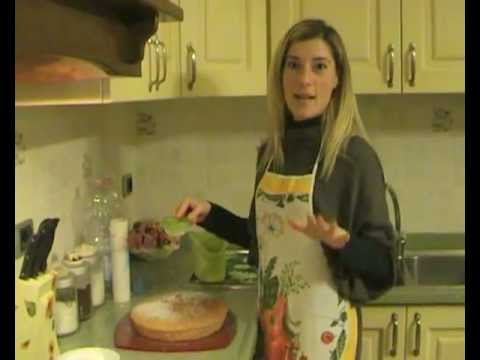

In [32]:
YouTubeVideo('tknvPTMGJEg')

Let's download the video

In [33]:
from pytube import YouTube

yt = YouTube("https://www.youtube.com/watch?v=tknvPTMGJEg")
yt.streams.filter(file_extension="mp4").get_by_resolution("360p").download("./downloaded-video.mp4")

'/home/hexa/Jupyter/ytm-data-poc/./downloaded-video.mp4/torta Margherita PIUMA ricetta passo passo tutorial base per decorazioni.mp4'

-------------

# Next Steps

Next, we need to train our model with cooking dataset only, abstract steps will be as follows:

- Train the model on downloaded dataset for cooking only
- Write script to get input from user for any youtube video
- Download the video and convert downloaded video into frames
- Run the trained model to identify labels for the video